Proofs with some concepts related to graph analysis.

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

In [4]:


def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=900, labels=mylabels, with_labels=True)
    plt.show()

def generate_random_graph(n_nodes, prob_union):
  adj = np.random.rand(n_nodes, n_nodes)
  for i in range(n_nodes):
    for j in range(i, n_nodes):
      if adj[i][j] > prob_union:
        adj[i][j] = 0
      else:
        adj[i][j] = 1
      adj[j][i] = adj[i][j]
    adj[i][i] = 0

  return adj

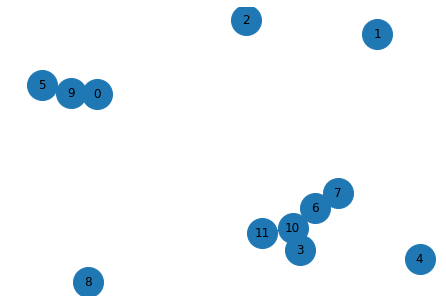

In [16]:
N = 12
PROB_CONNECTED = 0.1

labels = {i: str(i) for i in range(N)}
adjacency_matrix = generate_random_graph(N, PROB_CONNECTED)
show_graph_with_labels(adjacency_matrix, labels)

In [6]:
adjacency_matrix

array([[0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

# Connected components

In [21]:
eigenvalues_A, _ = np.linalg.eig(adjacency_matrix)


In [22]:
laplacian = adjacency_matrix.copy()
for i in range(N):
  laplacian[i][i] = - sum(adjacency_matrix[i, :])
laplacian = - laplacian

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(laplacian)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


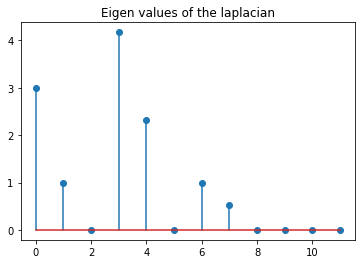

In [26]:
plt.stem(eigenvalues)
plt.title("Eigen values of the laplacian");

The number of times the 0 eigenvalue appears is equal to the number of connected components in the graph.

# Fourier transform

In [29]:
t = np.linspace(0, N, N)
f = np.cos(0.5 * np.pi * t / N)

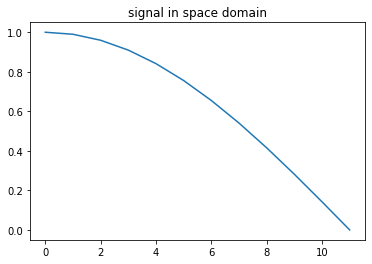

In [30]:
plt.plot(f)
plt.title("signal in space domain");

In [31]:
order_eigenvalues = np.argsort(eigenvalues)
eigenvalues = eigenvalues[order_eigenvalues]
eigenvectors = eigenvectors[:, order_eigenvalues]

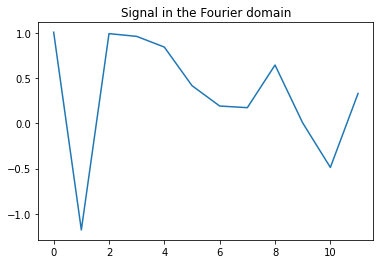

In [32]:
fourier_f = np.matmul(eigenvectors.T, f)
plt.plot(fourier_f)
plt.title("Signal in the Fourier domain");